## Montreal Python 69 - Tutorial
### By Abbas Taher
### GoFlek Inc.
### Monday Feb 5th 2018
### Three Methods to Aggregate Subscriber's Interest - Aggregating Data
### AGENDA:

>      a- Recipe 1- Using Python Dictionary
   
>      b- Short Overview of PySpark
      
>      c- Recipe 2- Using Apache Spark - GroupBy Transformation
      
>      d- Recipe 3- Using Apache Spark - ReduceBy Transformation

## Problem Statment: "Aggregate Interest by ID"
>     For Subscribers of an Online Magazine
>     Aggregate each subscriber's interest/likes into a (key,value) pair in one record


### Original Data:

In [1]:
import pandas as pd
pd.set_option('display.max_rows',15)  # change preview settings

fname = './InterestData.csv'
subscrib_data = pd.read_csv(fname, delimiter =';')
subscrib_data

,ID,Interest
0,1001,Sports
1,1001,Techno
2,1002,Auto
3,1002,Food
4,1002,Sports
5,1002,Techno
6,1003,Food
...,...,...
37,1018,Auto
38,1018,Food


### Expected Output after Aggregating by ID:

In [2]:
import pandas as pd
pd.set_option('display.max_rows',20)  # change preview settings

fname = './InterestAggregated.csv'
subscrib_data = pd.read_csv(fname, delimiter =';')
subscrib_data

# Note: key = ID ; Interest = Long string with commas between each interest

,ID,Interest
0,1001,"Sports, Techno"
1,1002,"Auto, Food, Sports, Techno"
2,1003,Food
3,1004,"Auto, Food"
4,1005,"Auto, Food, Techno"
5,1006,"Food, Sports, Techno"
6,1007,"Sports, Techno"
7,1008,"Auto, Techno"
8,1009,Food
9,1010,"Auto, Food"


## RECIPE \#1: Using A Python Dictionary

In [14]:
import csv
from collections import defaultdict  

aggInterest = defaultdict(list)        # dictionary <key,[list]>
header = None

# Read the file into a dictionary
with open('./InterestData.csv','r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    header = next(readCSV)  
    for row in readCSV:                         # loop over all records in file
        aggInterest[row[0]].append((row[1]))    # <--- aggregating interest into the corresponding dictionary key

# Write the dictionary data into the file         
with open('./aggInterest.csv', 'w') as csvfile:         
    writeCSV = csv.writer(csvfile, delimiter=';')
    writeCSV.writerow(header)
    for idd, interest in aggInterest.items():
        writeCSV.writerow((idd,interest))

In [16]:
text_file = open('./aggInterest.csv', 'r')
for line in text_file:
    print(line)
    
#Note: This is not quite what we are looking for, we want to save a long string as one field rather than a list   

ID;Interest

1001;['Sports', 'Techno']

1002;['Auto', 'Food', 'Sports', 'Techno']

1003;['Food']

1004;['Auto', 'Food']

1005;['Auto', 'Food', 'Techno']

1006;['Food', 'Sports', 'Techno']

1007;['Sports', 'Techno']

1008;['Auto', 'Techno']

1009;['Food']

1010;['Auto', 'Food']

1011;['Food', 'Sport']

1012;['Auto', 'Food', 'Sports', 'Techno']

1013;['Auto']

1014;['Sports']

1015;['Auto', 'Food']

1016;['Auto', 'Food', 'Sports', 'Techno']

1017;['Sports']

1018;['Auto', 'Food', 'Techno']

1019;['Food', 'Techno']

1020;['Auto', 'Food']



In [5]:
with open('./aggInterest.csv', 'w') as csvfile:         
    writeCSV = csv.writer(csvfile, delimiter=';')
    writeCSV.writerow(header)
    for idd, interestLst in aggInterest.items():
        interest = ",".join(interestLst)        #  <--- join the list into a long string
        writeCSV.writerow((idd,interest))

text_file = open('./aggInterest.csv', 'r')
for line in text_file:
    print(line)

# Note: This is better ... 

ID;Interest

1001;Sports,Techno

1002;Auto,Food,Sports,Techno

1003;Food

1004;Auto,Food

1005;Auto,Food,Techno

1006;Food,Sports,Techno

1007;Sports,Techno

1008;Auto,Techno

1009;Food

1010;Auto,Food

1011;Food,Sport

1012;Auto,Food,Sports,Techno

1013;Auto

1014;Sports

1015;Auto,Food

1016;Auto,Food,Sports,Techno

1017;Sports

1018;Auto,Food,Techno

1019;Food,Techno

1020;Auto,Food



# Short Overview of PySpark

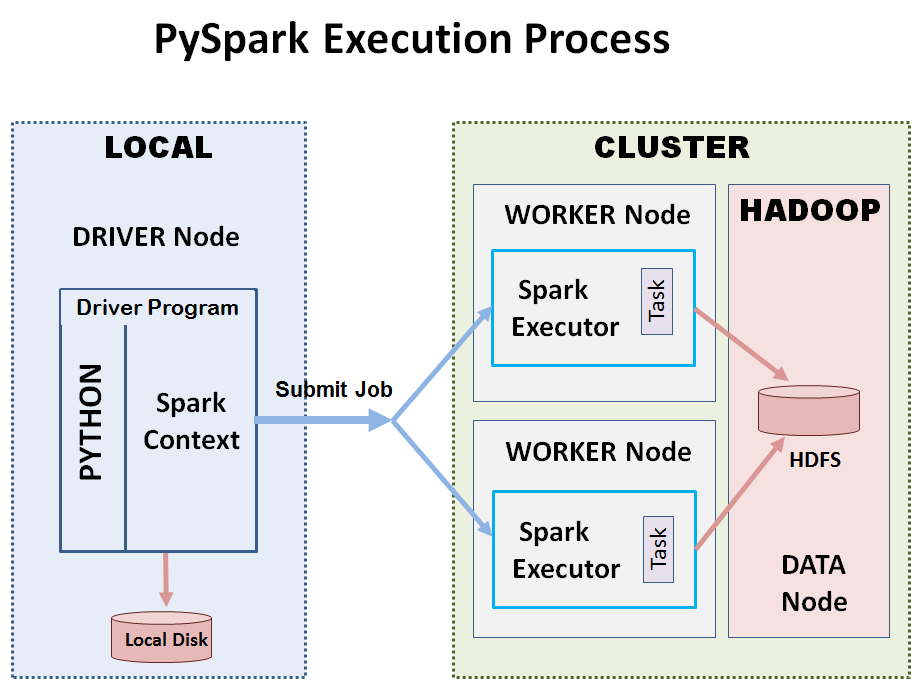

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "PySpark_Execution_Process.png", width=750, height=700)

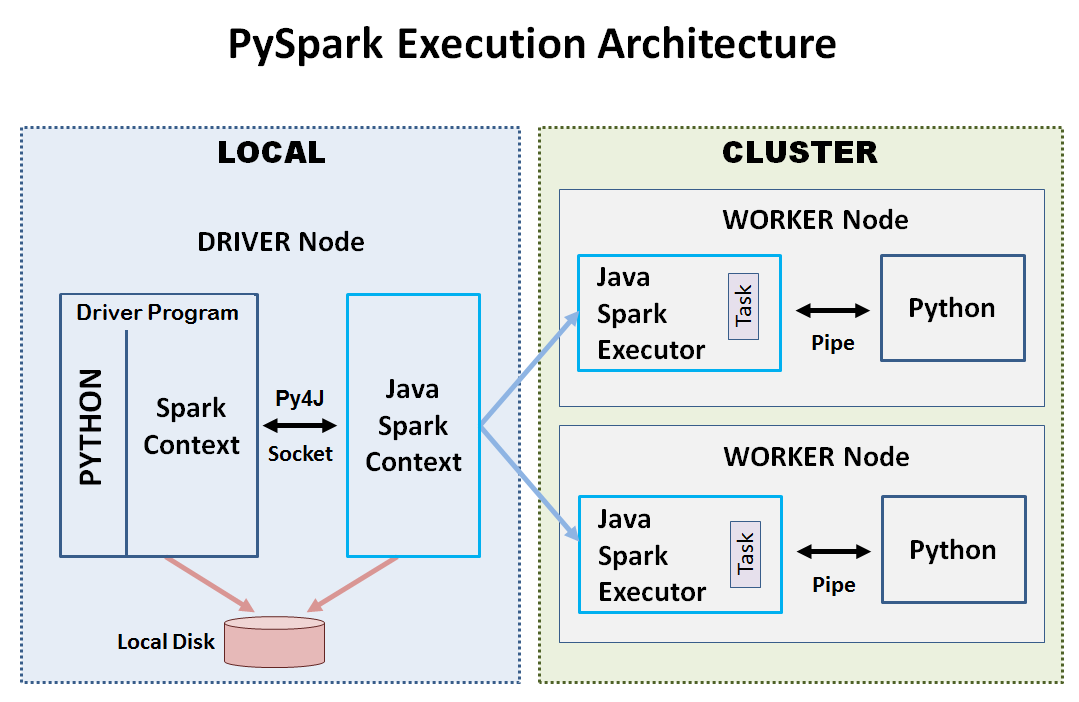

In [7]:
Image(filename ="PySpark_Execution_Architecture.png", width=800, height=750)

## RECIPE \#2: Using Apache Spark - GroupBy Transformation
### 1- Read Subsscriber Interest only data 
### 2- Use groupByKey to merge interest 
### 3- Convert the group-by list into a long string


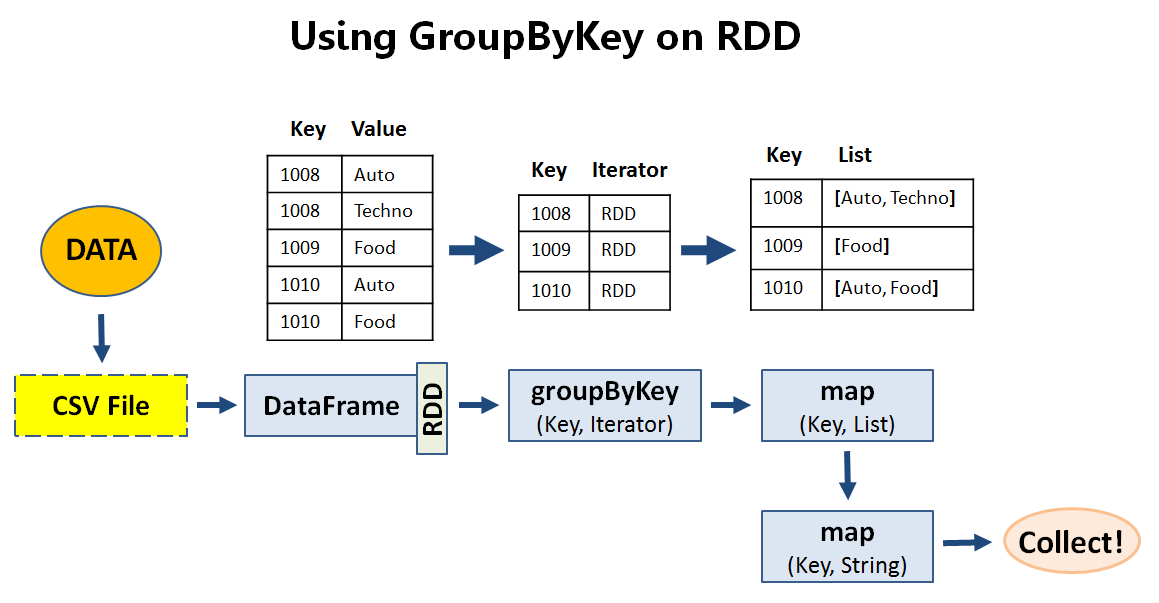

In [8]:
Image(filename ="Using_GroupByKey.png", width=900, height=900)

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config("spark.master", "local").appName("PythonCSV").getOrCreate()

file = "./InterestData.csv"

# read csv file includes header into a dataframe
dataframe = spark.read.csv(file, sep=";", inferSchema="true", header=True)

rdd1 = dataframe.rdd.groupByKey()

# to convert groupByKey() iterable into an actual list of strings (interest)
rdd2 = rdd1.map(lambda pair : (pair[0], list(pair[1])))


rdd3 = rdd2.map(lambda pair: (pair[0], (",".join(pair[1])) )) # convert list -> long string

for row in rdd3.collect():
    print(row)

print('\n',rdd1.collect()[0])  # just to show that the groupBy returned an iterator

spark.stop()

(1001, 'Sports,Techno')
(1002, 'Auto,Food,Sports,Techno')
(1003, 'Food')
(1004, 'Auto,Food')
(1005, 'Auto,Food,Techno')
(1006, 'Food,Sports,Techno')
(1007, 'Sports,Techno')
(1008, 'Auto,Techno')
(1009, 'Food')
(1010, 'Auto,Food')
(1011, 'Food,Sport')
(1012, 'Auto,Food,Sports,Techno')
(1013, 'Auto')
(1014, 'Sports')
(1015, 'Auto,Food')
(1016, 'Auto,Food,Sports,Techno')
(1017, 'Sports')
(1018, 'Auto,Food,Techno')
(1019, 'Food,Techno')
(1020, 'Auto,Food')

 (1001, <pyspark.resultiterable.ResultIterable object at 0x7fd690164400>)


## RECIPE \#3: Using Apache Spark - ReduceBy Transformation
### 1- Read Subsscriber Interest only data 
### 2- Use ReduceByKey to merge interest 
### 3- Convert the interest value list into a long string


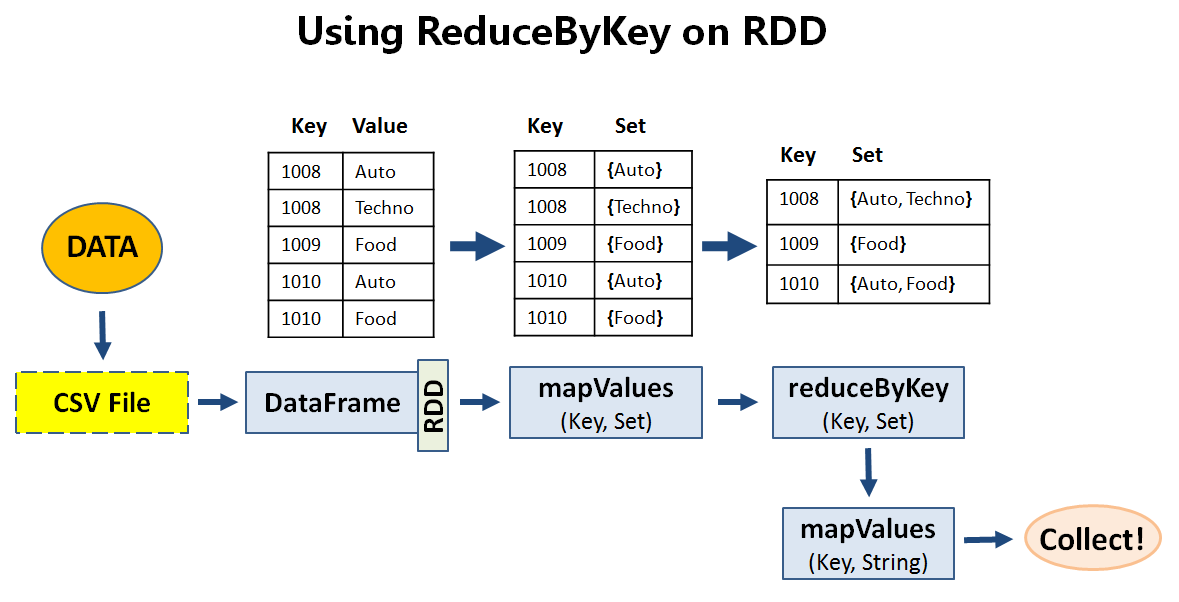

In [10]:
Image(filename ="Using_ReduceByKey.png", width=900, height=900)

In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config("spark.master", "local").appName("PythonCSV").getOrCreate()

file = "./InterestData.csv"

# read csv file includes header into a dataframe
dataframe = spark.read.csv(file, sep=";", inferSchema="true", header=True)

# Convert value part -> Set('Interest') using mapValues
# Make a union of all Sets belonging to same key using reduceByKey
rdd1 = dataframe.rdd.mapValues(lambda interest: {interest})\
                .reduceByKey(lambda s1, s2: s1.union(s2))  


rdd3 = rdd1.mapValues(lambda sett: ((",".join(sett)) )) # convert value part -> long string

for row in rdd3.collect():
    print(row)

spark.stop()

(1001, 'Techno,Sports')
(1002, 'Auto,Techno,Sports,Food')
(1003, 'Food')
(1004, 'Auto,Food')
(1005, 'Auto,Techno,Food')
(1006, 'Food,Techno,Sports')
(1007, 'Techno,Sports')
(1008, 'Auto,Techno')
(1009, 'Food')
(1010, 'Auto,Food')
(1011, 'Sport,Food')
(1012, 'Auto,Techno,Sports,Food')
(1013, 'Auto')
(1014, 'Sports')
(1015, 'Auto,Food')
(1016, 'Auto,Techno,Sports,Food')
(1017, 'Sports')
(1018, 'Auto,Techno,Food')
(1019, 'Food,Techno')
(1020, 'Auto,Food')


## NOTES:
### Using reduceByKey is better than GroupBy because of the smaller shuffle size. When using redyceByKey  some aggregation occurs inside the Spark cluster where as in GroupByKey some processing happens in PySpark driver at the client side.

### Using Set {} in reduceByKey is better because it eleminate duplicate in (ID,Interest) pairs if there are any in InterestData.csv file.

### Using mapValues is better than using map when the key stays the same after a transformation.

## https://github.com/abbas-taher/Montreal-Python-69